In [1]:
# The code was removed by Watson Studio for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:

body = client_5e257c6d7253436b8386d986dead5ac0.get_object(Bucket='kaggletitanic-donotdelete-pr-daskavja7yquhk',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test1 = pd.read_csv(body)
df_test1.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#size of the table
df_train1.shape

(891, 12)

In [4]:
#general statistics of the numerical columns++++
df_train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#find out survivors of titanic
df_train1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

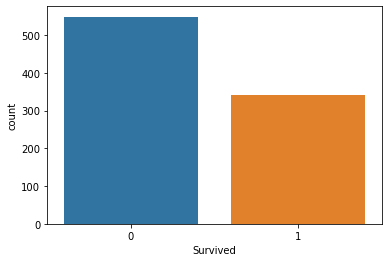

In [6]:
#Visualize survivors
import seaborn as sns
sns.countplot(df_train1['Survived'])

IndexError: list index out of range

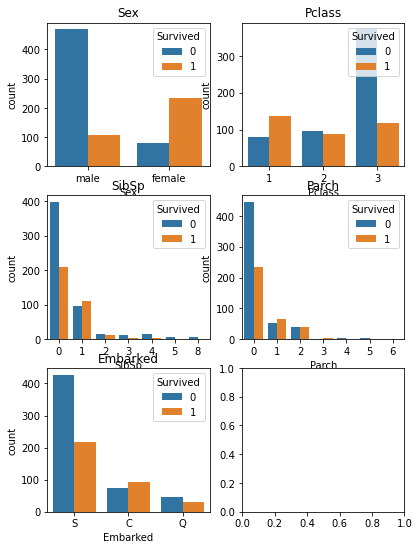

In [7]:
#visualize the count of survivors for the columns 'sex', 'pclass', 'sibsp', 'parch','embarked'


import matplotlib.pyplot as plt
cols1=['Sex', 'Pclass', 'SibSp', 'Parch','Embarked']

n_rows = 3
n_cols = 2

#subplot y tamano de la grafica
fig, axs = plt.subplots(n_rows,n_cols, figsize = (n_cols*3.2, n_rows*3))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols + c
        ax=axs[r][c] #show where to positio each subplot
        sns.countplot(df_train1[cols1[i]], hue=df_train1['Survived'], ax=ax)
        ax.set_title(cols1[i])
        ax.legend(title='Survived', loc='upper right')
plt.tight_layout()

In [ ]:
#survival rate by sex
df_train1.groupby('Sex')[['Survived']].mean()

In [8]:
#survival rate by sex
df_train1.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


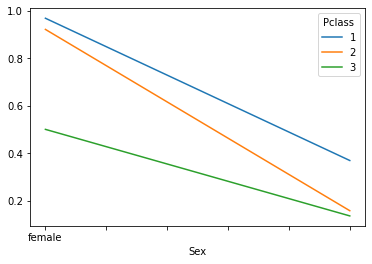

In [9]:
#visually survivale rate by sex and class
df_train1.pivot_table('Survived', index='Sex', columns='Pclass').plot()

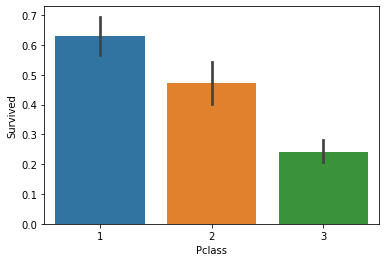

In [10]:
#plot survival rate of each class
sns.barplot(x='Pclass', y= 'Survived', data = df_train1)

In [11]:
#survival rate by sex, age and class
age=pd.cut(df_train1['Age'], [0,18,80])
df_train1.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

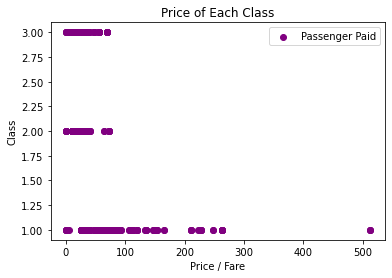

In [12]:
#plot prices paid per class
plt.scatter(df_train1['Fare'], df_train1['Pclass'], color='purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [13]:
#count empty values
df_train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train_test_data = [df_train1, df_test1]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
df_train1['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Capt          1
Ms            1
Sir           1
Mme           1
Lady          1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [16]:
df_test1['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [17]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mile":3, "Countess":3, "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Mme":3, "Capt":3, "Sir":3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [18]:
df_train1 = df_train1.drop(columns={'Name'})
df_test1 = df_test1.drop(columns={'Name'})

In [19]:
df_train1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [20]:
df_train1['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_test1['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)



In [21]:
df_train1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [22]:
df_train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64

In [23]:
df_train1["Age"].fillna(df_train1.groupby("Title")['Age'].transform("median"), inplace=True)
df_test1["Age"].fillna(df_train1.groupby("Title")['Age'].transform("median"), inplace=True)

In [24]:
df_train1 = pd.concat([df_train1, pd.get_dummies(df_train1['Embarked'])], axis=1)
df_test1 = pd.concat([df_test1, pd.get_dummies(df_test1['Embarked'])], axis=1)

In [25]:
df_train1 = df_train1.drop(columns={'Embarked', 'Cabin', 'Ticket'})
df_test1 = df_test1.drop(columns={'Embarked', 'Cabin', 'Ticket'})

In [26]:
df_train1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0.0,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,2.0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,1.0,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,2.0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0.0,0,0,1


In [27]:
train_test_data1 = [df_train1, df_test1]

In [28]:
for df_train1 in train_test_data1:
    df_train1.loc[df_train1['Fare'] <= 17, 'Fare'] = 0,
    df_train1.loc[(df_train1['Fare'] > 17) & (df_train1['Fare'] <= 30), 'Fare'] = 1,
    df_train1.loc[(df_train1['Fare'] > 30) & (df_train1['Fare'] <= 100), 'Fare'] = 2,
    df_train1.loc[df_train1['Fare'] > 100, 'Fare'] = 3


In [29]:
for df_test1 in train_test_data1:
    df_test1.loc[df_test1['Fare'] <= 17, 'Fare'] = 0,
    df_test1.loc[(df_test1['Fare'] > 17) & (df_test1['Fare'] <= 30), 'Fare'] = 1,
    df_test1.loc[(df_test1['Fare'] > 30) & (df_test1['Fare'] <= 100), 'Fare'] = 2,
    df_test1.loc[df_test1['Fare'] > 100, 'Fare'] = 3

In [30]:
df_test1.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,C,Q,S
0,892,3,0,34.5,0,0,0.0,0.0,0,1,0
1,893,3,1,47.0,1,0,0.0,2.0,0,0,1
2,894,2,0,62.0,0,0,0.0,0.0,0,1,0
3,895,3,0,27.0,0,0,0.0,0.0,0,0,1
4,896,3,1,22.0,1,1,0.0,2.0,0,0,1
5,897,3,0,14.0,0,0,0.0,0.0,0,0,1
6,898,3,1,30.0,0,0,0.0,1.0,0,1,0
7,899,2,0,26.0,1,1,0.0,0.0,0,0,1
8,900,3,1,18.0,0,0,0.0,2.0,1,0,0
9,901,3,0,21.0,2,0,0.0,0.0,0,0,1


In [234]:
train_test_data2 = [df_train1, df_test1]

In [235]:
for df_test1 in train_test_data2:
    df_test1.loc[df_test1['Age'] <= 16, 'Age'] = 0,
    df_test1.loc[(df_test1['Age'] > 16) & (df_test1['Age'] <= 26), 'Age'] = 1,
    df_test1.loc[(df_test1['Age'] > 26) & (df_test1['Age'] <= 36), 'Age'] = 2,
    df_test1.loc[(df_test1['Age'] > 36) & (df_test1['Age'] <= 62), 'Age'] = 3,
    df_test1.loc[df_test1['Age'] > 62, 'Age'] = 4

In [236]:
for df_train1 in train_test_data2:
    df_train1.loc[df_train1['Age'] <= 16, 'Age'] = 0,
    df_train1.loc[(df_train1['Age'] > 16) & (df_train1['Age'] <= 26), 'Age'] = 1,
    df_train1.loc[(df_train1['Age'] > 26) & (df_train1['Age'] <= 36), 'Age'] = 2,
    df_train1.loc[(df_train1['Age'] > 36) & (df_train1['Age'] <= 62), 'Age'] = 3,
    df_train1.loc[df_train1['Age'] > 62, 'Age'] = 4

In [237]:
df_train1.head(50)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,C,Q,S
0,892,3,0,0.0,0,0,0.0,0.0,0,1,0
1,893,3,1,0.0,1,0,0.0,2.0,0,0,1
2,894,2,0,0.0,0,0,0.0,0.0,0,1,0
3,895,3,0,0.0,0,0,0.0,0.0,0,0,1
4,896,3,1,0.0,1,1,0.0,2.0,0,0,1
5,897,3,0,0.0,0,0,0.0,0.0,0,0,1
6,898,3,1,0.0,0,0,0.0,1.0,0,1,0
7,899,2,0,0.0,1,1,0.0,0.0,0,0,1
8,900,3,1,0.0,0,0,0.0,2.0,1,0,0
9,901,3,0,0.0,2,0,0.0,0.0,0,0,1


In [31]:
df_train1 = df_train1.fillna(0)
df_test1 = df_test1.fillna(0)

In [32]:
df_train1 = df_train1.astype('float64')
df_test1 = df_test1.astype('float64')

In [33]:
#split data into independent X and dependen Y
Y = df_train1.iloc[:, 1].values
X = df_train1.iloc[:, 2:12].values

In [34]:
#Split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [35]:
#Normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
#Create a function with ML models
def models(X_train, Y_train):
    
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #XGBoost
    from xgboost import XGBClassifier
    XGB = XGBClassifier(colsample_by_level=0.9,
                       colsample_bytree = 0.8,
                       gamma = 0.99,
                       max_depth = 5,
                       min_child_weight = 1,
                       n_estimators = 10,
                       nthread = 4,
                       random_state = 2,
                       silent = True)
    XGB.fit(X_train, Y_train)
    
    
    #K-Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #Support Vector
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #SVC (RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #Gauss
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree =DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    #Print accuracy for each model
    print('[0]Logistic:', log.score(X_test, Y_test))
    print('[1]KNN:', knn.score(X_test, Y_test))
    print('[2]SVC Linear:', svc_lin.score(X_test, Y_test))
    print('[3]SVC RBF:', svc_rbf.score(X_test, Y_test))
    print('[4]GaussNB:', gauss.score(X_test, Y_test))
    print('[5]Decision Tree:', tree.score(X_test, Y_test))
    print('[6]Random Forest:', forest.score(X_test, Y_test))
    print('[7]XGB:', XGB.score(X_test, Y_test))


    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, XGB

In [37]:
model = models(X_train, Y_train)

[0]Logistic: 0.7988826815642458
[1]KNN: 0.8044692737430168
[2]SVC Linear: 0.770949720670391
[3]SVC RBF: 0.8100558659217877
[4]GaussNB: 0.7877094972067039
[5]Decision Tree: 0.7262569832402235
[6]Random Forest: 0.8379888268156425
[7]XGB: 0.7988826815642458


In [38]:
#confusion matrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    #Extract TN, FP, FN, TP
    TN, FP, FN, TP = cm.ravel()
    
    test_score=(TP + TN) / (TP+TN+FN+FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[94 16]
 [20 49]]
Model[0] Testing Accuracy = "0.7988826815642458"

[[96 14]
 [21 48]]
Model[1] Testing Accuracy = "0.8044692737430168"

[[88 22]
 [19 50]]
Model[2] Testing Accuracy = "0.770949720670391"

[[97 13]
 [21 48]]
Model[3] Testing Accuracy = "0.8100558659217877"

[[86 24]
 [14 55]]
Model[4] Testing Accuracy = "0.7877094972067039"

[[85 25]
 [24 45]]
Model[5] Testing Accuracy = "0.7262569832402235"

[[100  10]
 [ 19  50]]
Model[6] Testing Accuracy = "0.8379888268156425"

[[93 17]
 [19 50]]
Model[7] Testing Accuracy = "0.7988826815642458"



In [44]:
#Get feature importance
forest= model[6]
importances = pd.DataFrame({'feature': df_train1.iloc[:,2:12].columns,'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.260
Fare,0.254
Title,0.219
Pclass,0.080
Sex,0.075
SibSp,0.045
Parch,0.032
S,0.015
C,0.013


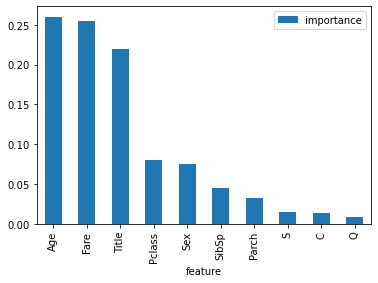

In [45]:
#Visualize importance
importances.plot.bar()

In [46]:
#print prediction of the random forest
pred=model[6].predict(X_test)
print(pred)

print()

#print actual values
print (Y_test)

[0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]

[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1.

In [47]:
df_test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,C,Q,S
0,892.0,3.0,0.0,34.5,0.0,0.0,7.8292,0.0,0.0,1.0,0.0
1,893.0,3.0,1.0,47.0,1.0,0.0,7.0000,2.0,0.0,0.0,1.0
2,894.0,2.0,0.0,62.0,0.0,0.0,9.6875,0.0,0.0,1.0,0.0
3,895.0,3.0,0.0,27.0,0.0,0.0,8.6625,0.0,0.0,0.0,1.0
4,896.0,3.0,1.0,22.0,1.0,1.0,12.2875,2.0,0.0,0.0,1.0


In [48]:
df_test2 = df_test1.iloc[:,1:11]

In [49]:
pred2=model[6].predict(df_test2)
print(pred2)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [50]:
pred2.shape

(418,)

In [51]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test1['PassengerId']
submission ['Survived'] = pred2
submission.head()

,PassengerId,Survived
0,892.0,0.0
1,893.0,0.0
2,894.0,0.0
3,895.0,0.0
4,896.0,0.0


In [52]:
submission = submission.astype('Int32')

In [53]:
if len(submission) == len(df_test2):
    print('submission DF is the same lentgh as df_test2')
else:
    print('wont be able to submit to kaggle')

submission DF is the same lentgh as df_test2


In [54]:
# Define functions to download as CSV or Excel
from IPython.display import HTML
import pandas as pd
import base64, io

# Download as CSV: data frame, optional title and filename
def create_download_link_csv(df, title = "Download CSV file", filename = "data.csv"):  
    # generate in-memory CSV, then base64-encode it
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# Download as Excel: data frame, optional title and filename
def create_download_link_excel(df, title = "Download Excel file", filename = "data.xlsx"):  
    # to_excel() does not work to string buffer directly
    output = io.BytesIO()
    # Use the BytesIO object as the filehandle
    writer = pd.ExcelWriter(output, engine='xlsxwriter')
    # Write the data frame to the BytesIO object and save it
    df.to_excel(writer, sheet_name='Sheet1')
    writer.save()
    excel_data = output.getvalue()
    b64 = base64.b64encode(excel_data)
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/xml;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [55]:
# Download as CSV
create_download_link_csv(submission,"Download my data","sample.csv")